In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

In [3]:
dir_covid_data = '../../datalake/silver/covid_data/'
covid_file = f'{dir_covid_data}/covid_19_clean_complete_filtro_1.csv'
covid_data = pd.read_csv(covid_file)
covid_data.drop('Unnamed: 0', axis=1, inplace=True)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.set_index('Date', inplace=True)
daily_cases = covid_data.groupby('Country/Region')['Confirmed'].diff(1)
daily_deaths = covid_data.groupby('Country/Region')['Deaths'].diff(1)
daily_recovered = covid_data.groupby('Country/Region')['Recovered'].diff(1)
daily_active = covid_data.groupby('Country/Region')['Active'].diff(1)
covid_data['DailyCases'] = daily_cases
covid_data['DailyDeaths'] = daily_deaths
covid_data['DailyRecovered'] = daily_recovered
covid_data['DailyActive'] = daily_active
covid_data.head()

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,DailyCases,DailyDeaths,DailyRecovered,DailyActive
Date,,,,,,,,,,,,,
2020-01-22,NaN,Argentina,-38.416100,-63.61670,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Chile,-35.675100,-71.54300,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Ecuador,-1.831200,-78.18340,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Mexico,23.634500,-102.55280,0,0,0,0,Americas,NaN,NaN,NaN,NaN
2020-01-22,NaN,Spain,40.463667,-3.74922,0,0,0,0,Europe,NaN,NaN,NaN,NaN


In [4]:
reg_data = covid_data[['Country/Region', 'DailyCases']].dropna()

## ARGENTINA

In [ ]:
reg_data = reg_data[reg_data['Country/Region'] == 'Argentina']
reg_data = reg_data[['DailyCases']]
reg_data

In [37]:
reg_data.ne(0).idxmax()[0]

Timestamp('2020-03-03 00:00:00')

<AxesSubplot:xlabel='Date'>

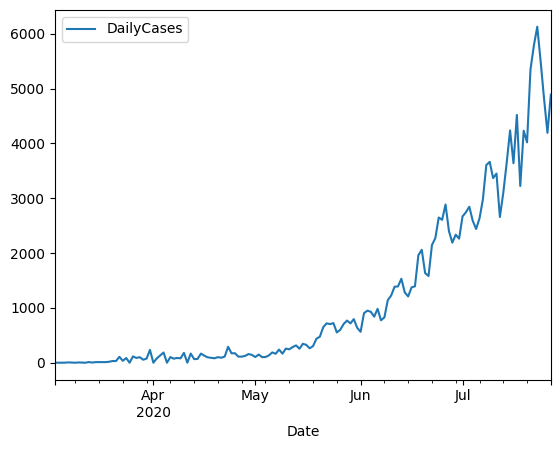

In [39]:
reg_data2 = reg_data.loc[reg_data.ne(0).idxmax()[0]:]
reg_data2.plot()

In [41]:
len(reg_data2), len(reg_data2)*0.7, len(reg_data2)*0.3

(147, 102.89999999999999, 44.1)

In [163]:
train_data = reg_data2.iloc[:103]
test_data = reg_data2.iloc[103:]
len(train_data), len(test_data)

(103, 44)

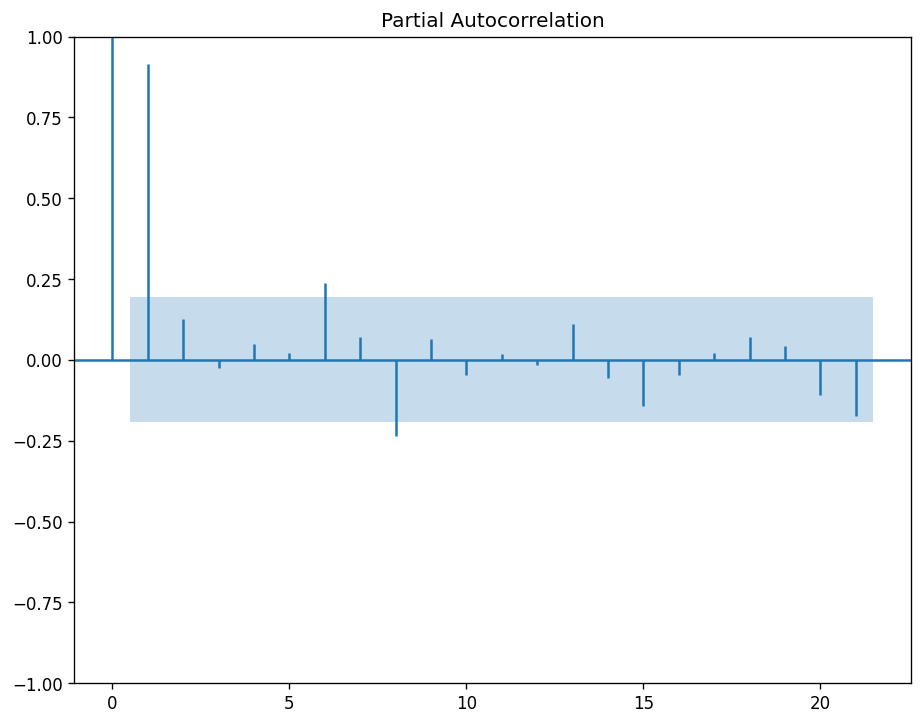

In [166]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data['DailyCases'], marker='');

Modelo AR

In [167]:
ar_model = ARIMA(train_data['DailyCases'], order=(1, 0, 0))
ar_model = ar_model.fit()
print(ar_model.summary())

C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

                               SARIMAX Results                                
Dep. Variable:             DailyCases   No. Observations:                  103
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -613.555
Date:                Tue, 06 Dec 2022   AIC                           1233.110
Time:                        22:28:58   BIC                           1241.014
Sample:                    03-03-2020   HQIC                          1236.311
                         - 06-13-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.2678   1201.884      0.245      0.807   -2061.382    2649.917
ar.L1          0.9913      0.020     48.439      0.000       0.951       1.031
sigma2      8406.9174    831.335     10.113      0.0

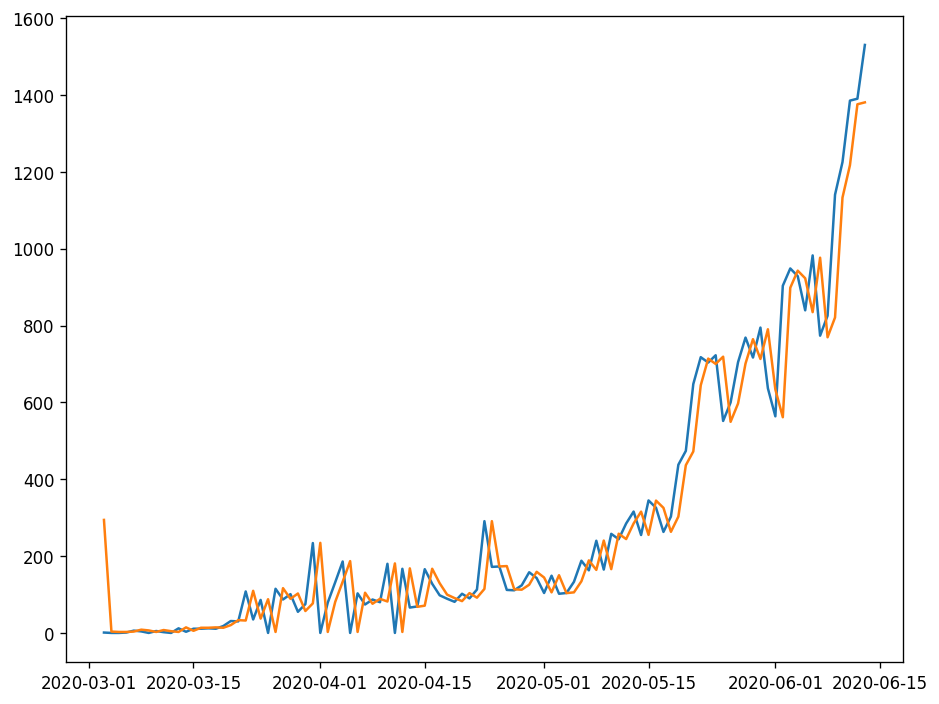

In [168]:
pred = ar_model.predict(start=0, end=len(train_data['DailyCases'])-1)
plt.plot(train_data['DailyCases'])
plt.plot(pred)

In [169]:
fcst = pd.DataFrame([])
data = train_data.copy()
ar_model = ARIMA(train_data['DailyCases'], order=(3, 0, 0))
ar_model = ar_model.fit()
for i in range(7):
    fcst = pd.concat([fcst, ar_model.forecast()])
    data = pd.concat([data, test_data.iloc[i:i+1]])
    ar_model_test = ARIMA(data['DailyCases'], order=(3, 0, 0))
    ar_model = ar_model_test.smooth(ar_model.params)


C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

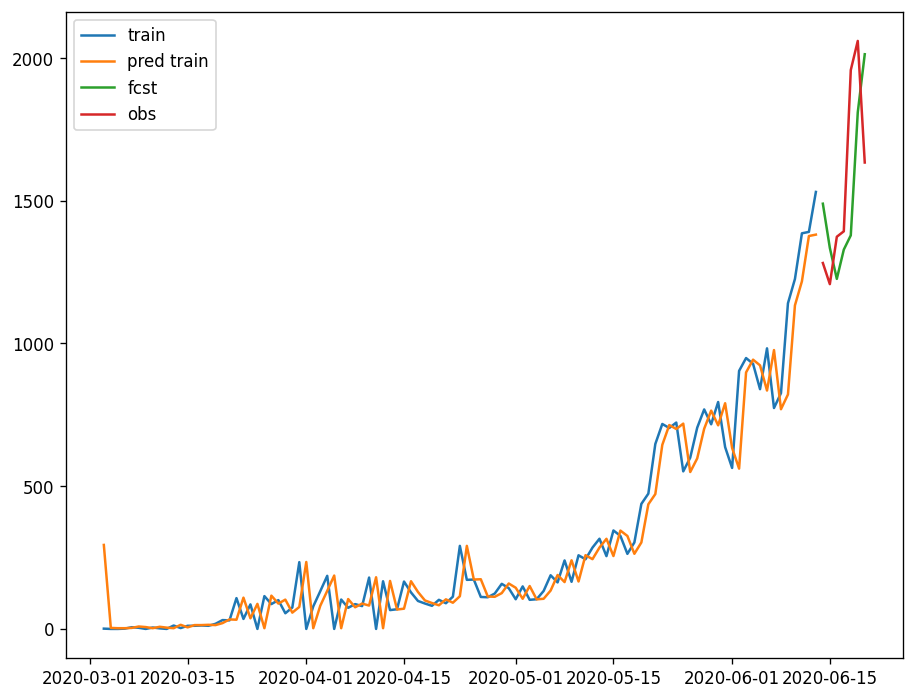

In [170]:
plt.plot(train_data['DailyCases'], label='train')
plt.plot(pred, label='pred train')
plt.plot(fcst, label='fcst')
plt.plot(test_data[:7], label='obs')
plt.legend()

## modelo MA

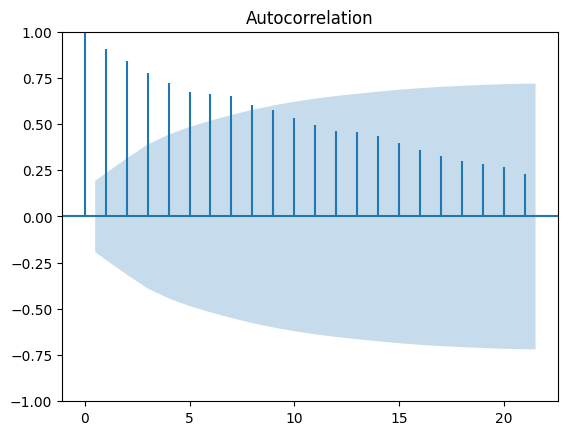

In [118]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_data['DailyCases'],  marker='');

In [119]:
ma_model = ARIMA(train_data['DailyCases'], order=(0, 0, 7))
ma_model = ma_model.fit()
print(ma_model.summary())

C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

                               SARIMAX Results                                
Dep. Variable:             DailyCases   No. Observations:                  103
Model:                 ARIMA(0, 0, 7)   Log Likelihood                -639.587
Date:                Tue, 06 Dec 2022   AIC                           1297.174
Time:                        21:15:26   BIC                           1320.887
Sample:                    03-03-2020   HQIC                          1306.779
                         - 06-13-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.5902     96.744      3.045      0.002     104.975     484.206
ma.L1          0.9975     22.520      0.044      0.965     -43.140      45.135
ma.L2          1.0711     11.100      0.096      0.9

C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


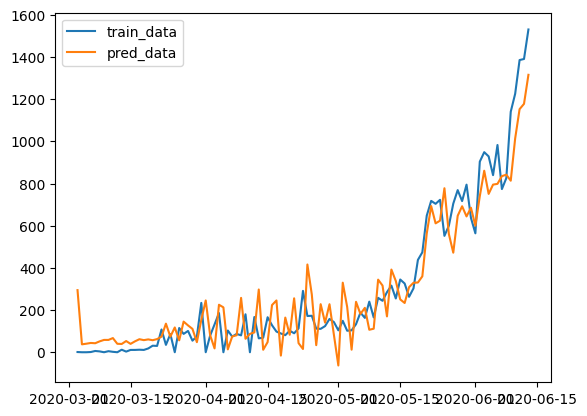

In [121]:
pred = ma_model.predict(start=0, end=len(train_data['DailyCases'])-1)
plt.plot(train_data['DailyCases'], label='train_data')
plt.plot(pred, label='pred_data')
plt.legend()

## Modelo ARIMA

In [173]:
arima_model = ARIMA(train_data['DailyCases'], order=(3, 2, 1))
arima_model = arima_model.fit()
print(arima_model.summary())

C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             DailyCases   No. Observations:                  103
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -595.272
Date:                Tue, 06 Dec 2022   AIC                           1200.545
Time:                        22:30:54   BIC                           1213.620
Sample:                    03-03-2020   HQIC                          1205.838
                         - 06-13-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3636      0.102     -3.557      0.000      -0.564      -0.163
ar.L2         -0.1571      0.080     -1.963      0.050      -0.314      -0.000
ar.L3         -0.0931      0.114     -0.817      0.4

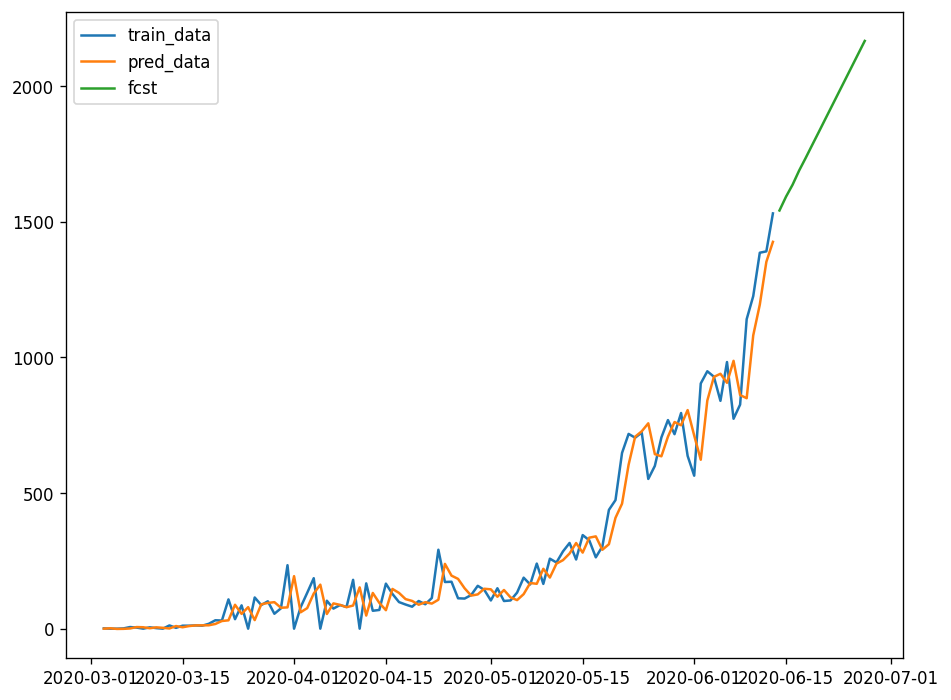

In [174]:
pred = arima_model.predict(start=0, end=len(train_data['DailyCases'])-1)
plt.plot(train_data['DailyCases'], label='train_data')
plt.plot(pred, label='pred_data')
plt.plot( arima_model.forecast(14), label='fcst')
plt.legend()

In [175]:
fcst = pd.DataFrame([])
data = train_data.copy()
arima_model = ARIMA(train_data['DailyCases'], order=(3, 2, 1))
arima_model = arima_model.fit()
for i in range(7):
    fcst = pd.concat([fcst, arima_model.forecast()])
    data = pd.concat([data, test_data.iloc[i:i+1]])
    arima_model_test = ARIMA(data['DailyCases'], order=(3, 2, 1))
    arima_model = arima_model_test.smooth(arima_model.params)


C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

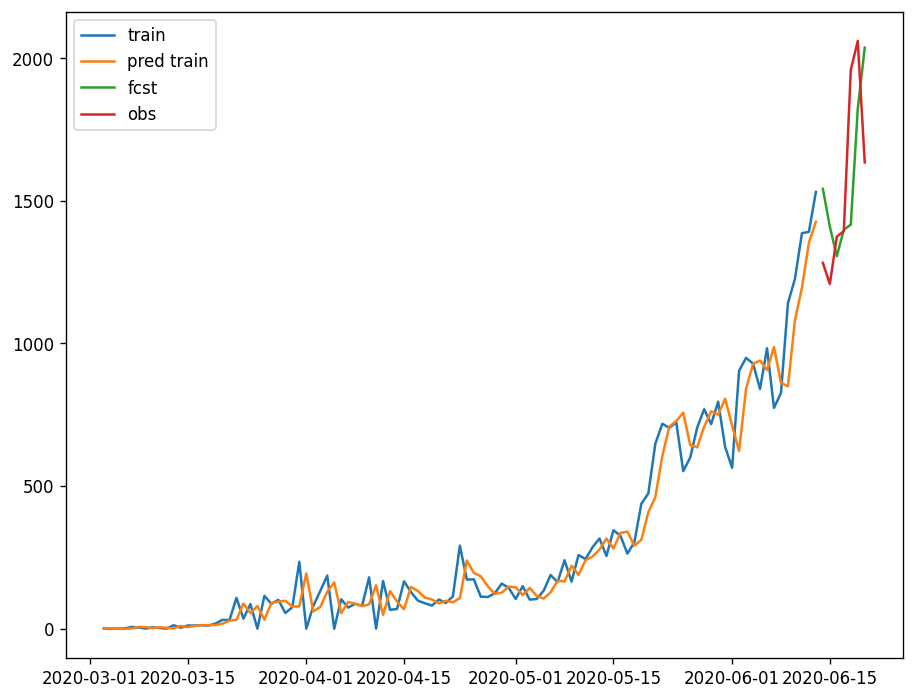

In [176]:
plt.plot(train_data['DailyCases'], label='train')
plt.plot(pred, label='pred train')
plt.plot(fcst, label='fcst')
plt.plot(test_data[:7], label='obs')
plt.legend()

In [140]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train_data['DailyCases'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.310464
p-value: 1.000000


C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ADF Statistic: 3.310464
p-value: 1.000000
ADF Statistic: -2.056910
p-value: 0.262190


C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ADF Statistic: -7.250417
p-value: 0.000000


C:\Users\duart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ADF Statistic: -7.106672
p-value: 0.000000


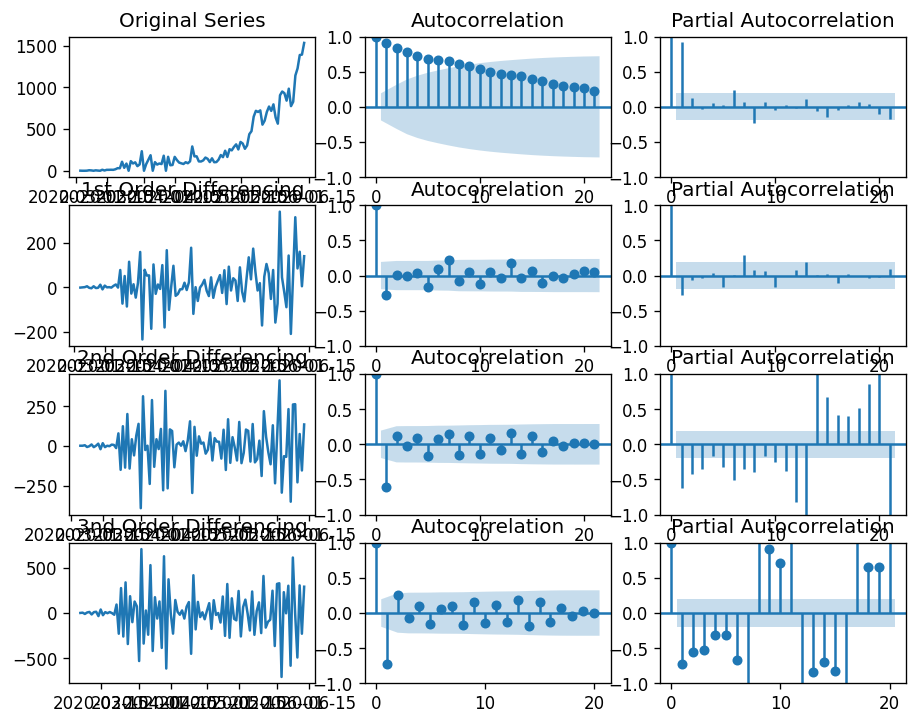

In [177]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data

# Original Series
fig, axes = plt.subplots(4, 3)
axes[0, 0].plot(train_data['DailyCases']); 
axes[0, 0].set_title('Original Series')
plot_acf(train_data['DailyCases'], ax=axes[0, 1], )
plot_pacf(train_data['DailyCases'], ax=axes[0, 2], marker='')
result = adfuller(train_data['DailyCases'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


# 1st Differencing
axes[1, 0].plot(train_data['DailyCases'].diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_data['DailyCases'].diff().dropna(), ax=axes[1, 1])
plot_pacf(train_data['DailyCases'].diff().dropna(), ax=axes[1, 2], marker='')
result = adfuller(train_data['DailyCases'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


# # 2nd Differencing
axes[2, 0].plot(train_data['DailyCases'].diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_data['DailyCases'].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(train_data['DailyCases'].diff().diff().dropna(), ax=axes[2, 2], marker='')
result = adfuller(train_data['DailyCases'].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


axes[3, 0].plot(train_data['DailyCases'].diff().diff().diff()); 
axes[3, 0].set_title('3nd Order Differencing')
plot_acf(train_data['DailyCases'].diff().diff().diff().dropna(), ax=axes[3, 1])
plot_pacf(train_data['DailyCases'].diff().diff().diff().dropna(), ax=axes[3, 2])
result = adfuller(train_data['DailyCases'].diff().diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

plt.show()

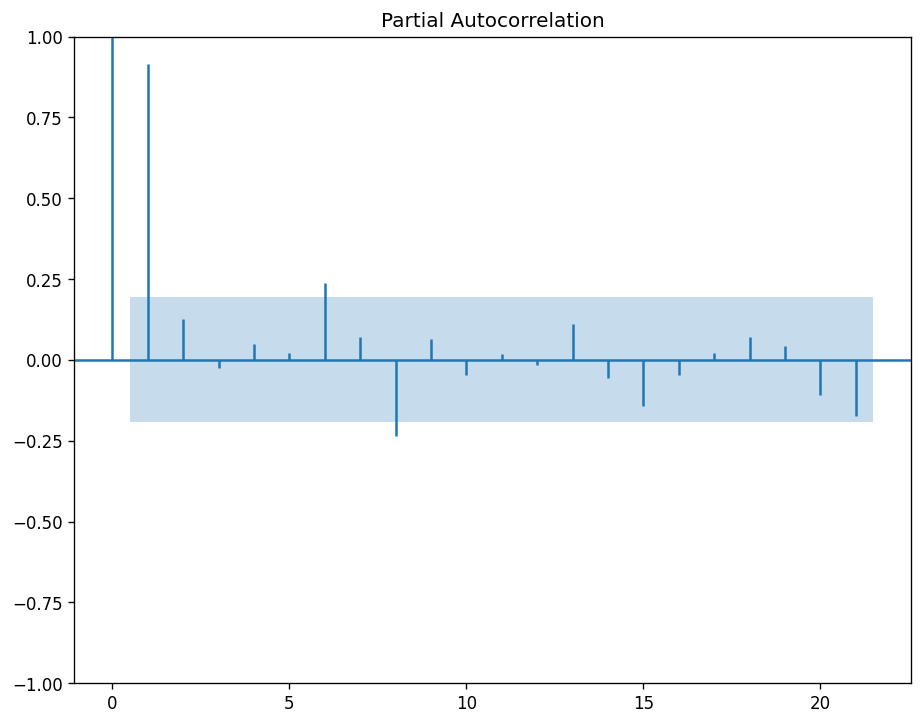

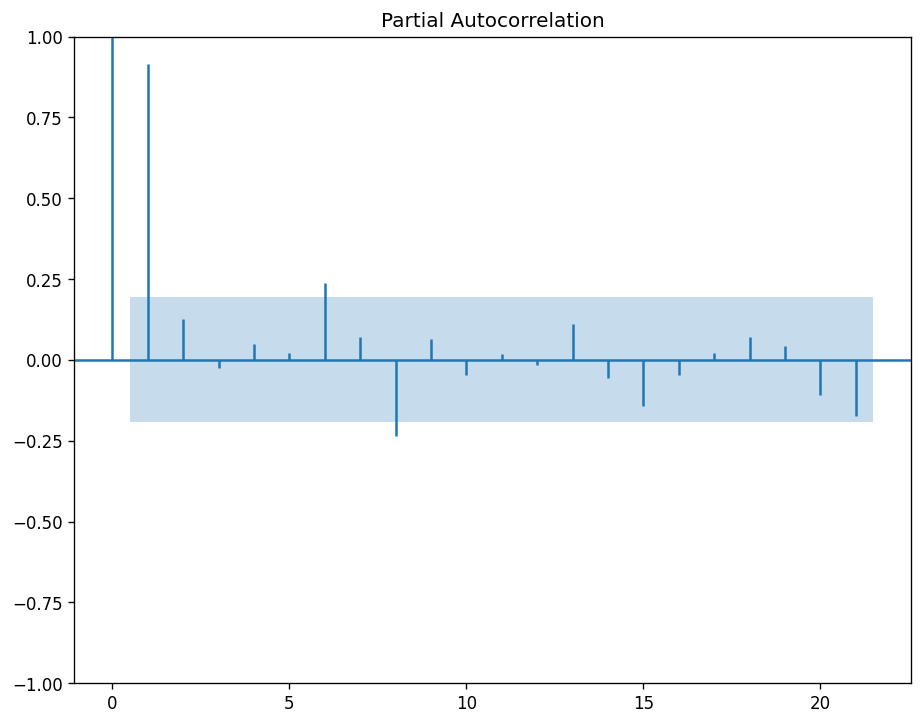

In [165]:
plot_pacf(train_data['DailyCases'], marker='')